In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import linalg

from semester6 import eigenproblem
from semester6.utils import print_matrix

pd.options.display.float_format = '{:,.16f}'.format
np.set_printoptions(precision=16, suppress=True)


def answer(a: np.array, eps: float) -> None:
    print("Исходная матрица:", end="")
    print_matrix(a)

    print("Степенной метод")
    (eigenvalue1, eigenvector1, count1) = eigenproblem.solve_partial(a,
                                                                     eigenproblem.PartialEigenproblemMethod.PowerMethod)
    print("Максимальное по модулю собственное число:", eigenvalue1)
    print("Собственный вектор:", eigenvector1)
    print("Количество итераций:", count1)

    print("Метод скалярных произведений")
    (eigenvalue2, eigenvector2, count2) = eigenproblem.solve_partial(a,
                                                                     eigenproblem.PartialEigenproblemMethod.DotProductMethod)
    print("Максимальное по модулю собственное число:", eigenvalue2)
    print("Собственный вектор:", eigenvector2)
    print("Количество итераций:", count2)

In [2]:
# This matrix is bad for this method -- it has two identical eigenvalues
a1 = np.array([[1, 4, 2], [-1, 5, 1], [0, 0, 1]])
answer(a1, 10e-6)

Исходная матрица:      
 1 4 2
-1 5 1
 0 0 1
Степенной метод
Максимальное по модулю собственное число: 3.0054682381910673
Собственный вектор: [0.8939384535355582 0.448189738046795  0.                ]
Количество итераций: 545
Метод скалярных произведений
Максимальное по модулю собственное число: 3.003860607917446
Собственный вектор: [0.8937375823754332 0.4485901624531191 0.                ]
Количество итераций: 389


In [3]:
a1_prime = np.array([[1, 0, 0], [0, 3, 1], [0, 0, 3]])
answer(a1_prime, 10e-6)

Исходная матрица:     
1 0 0
0 3 1
0 0 3
Степенной метод
Максимальное по модулю собственное число: 3.0054706147559305
Собственный вектор: [0.                 0.9999850900557813 0.0054607386067196]
Количество итераций: 548
Метод скалярных произведений
Максимальное по модулю собственное число: 3.0038585077433004
Собственный вектор: [0.                 0.9999702811212071 0.0077095313978191]
Количество итераций: 389


In [4]:
a2 = linalg.hilbert(4)
answer(a2, 10e-12)

Исходная матрица:                                                                           
1.0000000000000000 0.5000000000000000 0.3333333333333333 0.2500000000000000
0.5000000000000000 0.3333333333333333 0.2500000000000000 0.2000000000000000
0.3333333333333333 0.2500000000000000 0.2000000000000000 0.1666666666666667
0.2500000000000000 0.2000000000000000 0.1666666666666667 0.1428571428571428
Степенной метод
Максимальное по модулю собственное число: 1.5002142783136247
Собственный вектор: [0.7926051049996127 0.4519251489406496 0.3224191878966765
 0.2521639834702259]
Количество итераций: 5
Метод скалярных произведений
Максимальное по модулю собственное число: 1.5002142836075367
Собственный вектор: [0.792602171227696  0.4519270163035744 0.3224217562286154
 0.2521665743324167]
Количество итераций: 5


In [5]:
a3 = np.array([[1, 4, 2], [-1, 5, 1], [0, 0, 1]])

iter_count = 100

x = np.linspace(10e-6, 10e-12, num=iter_count, endpoint=False)
power_method_count = []
dot_product_method_count = []
for i in range(iter_count):
    (_, _, count1) = eigenproblem.solve_partial(a3, eigenproblem.PartialEigenproblemMethod.PowerMethod, eps=x[i])
    power_method_count.append(count1)
    (_, _, count2) = eigenproblem.solve_partial(a3, eigenproblem.PartialEigenproblemMethod.DotProductMethod, eps=x[i])
    dot_product_method_count.append(count2)


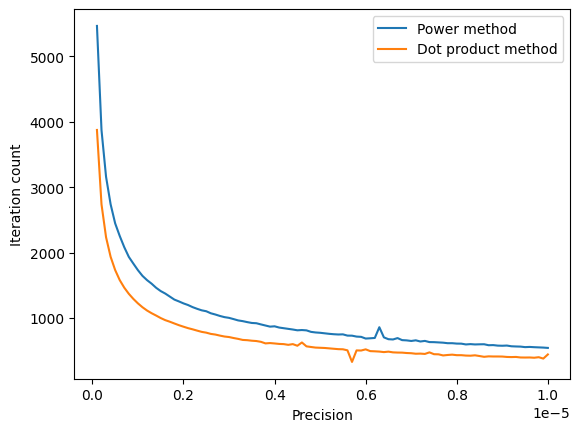

In [6]:
power_method, = plt.plot(x, power_method_count, label="Power method")
dot_product_method, = plt.plot(x, dot_product_method_count, label="Dot product method")
plt.legend(handles=[power_method, dot_product_method], loc='best')
plt.xlabel("Precision")
plt.ylabel("Iteration count")
plt.show()